Paul O'Leary

Final Project Code - AirBnB Review Analysis to Predict Category Ratings.

Project Team:
Alison Kahn
Gina McFarland


In [1]:
import numpy as np
import pandas as pd
import sklearn

import nltk
from textblob import TextBlob

Data Imported.  AirBnB data included Availabilities, Hosts, Listings and Reviews data files.  Only Reviews and Listings were used.  The first line of the listings.csv file was ignored.

In [3]:
# AirBnB data included Availabilities, Hosts, Listings and Reviews data files.  Only Reviews and Listings were used.

# avail = pd.read_csv("availabilities.csv")
# host = pd.read_csv("hosts.csv")
# lst = pd.read_csv("listings.csv")
rev = pd.read_csv("reviews.csv")

In [4]:
# Had to strip the first line from the file - just a title line, then worked fine.

lst = pd.read_csv('listings.csv')

### Basic EDA of the entire data set.

In [10]:
lst

,id,listing_url,name,description,host_id,host_since,neighbourhood,city,state,zipcode,...,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,2384,https://www.airbnb.com/rooms/2384,"Walk to UChicago, 10 min train to McCormick Place",Visiting The University of Chicago or attendin...,2613,8/29/08,Hyde Park,Chicago,IL,60637,...,$0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period
1,4505,https://www.airbnb.com/rooms/4505,One Great Apartment. 384 Great Reviews. 1 Bad ...,"We took the winter off, made things nicer arou...",5775,12/29/08,Little Village,Chicago,IL,60608,...,$25.00,96.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate
2,7126,https://www.airbnb.com/rooms/7126,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,17928,5/19/09,Ukrainian Village,Chicago,IL,60622,...,$0.00,93.0,10.0,9.0,10.0,10.0,10.0,10.0,f,moderate
3,9811,https://www.airbnb.com/rooms/9811,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,33004,8/21/09,Old Town,Chicago,IL,60614,...,$95.00,92.0,10.0,9.0,10.0,9.0,10.0,9.0,t,strict_14_with_grace_period
4,10610,https://www.airbnb.com/rooms/10610,3 Comforts of Cooperative Living,The condo is the 2nd floor in a lovely 1912 3-...,2140,8/16/08,Hyde Park,Chicago,IL,60615,...,$50.00,82.0,8.0,7.0,9.0,9.0,10.0,9.0,t,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,40262251,https://www.airbnb.com/rooms/40262251,Perfect Old Town condo you will love. Come stay!!,"This is a beautiful million-dollar condo, perf...",2912333,7/12/12,NaN,Chicago,IL,60610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible
8529,40263536,https://www.airbnb.com/rooms/40263536,☼O'Hare-1Bed-Private Bath-Rosemont-AllState Arena,Is this your first booking on Airbnb? Use this...,50413447,12/2/15,NaN,Des Plaines,IL,60018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible
8530,40264107,https://www.airbnb.com/rooms/40264107,One queen bed room in cozy house northwest side,"Nice and quiet neighborhood, save a bunch agai...",35065108,6/5/15,NaN,Chicago,IL,60634,...,$12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible
8531,40264148,https://www.airbnb.com/rooms/40264148,"☼2bed 1bath O'hare, Allstate arena,Casino,Rose...",Is this your first booking on Airbnb? Use this...,50413447,12/2/15,NaN,Des Plaines,IL,60018,...,$0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,moderate


In [11]:
type(lst)

pandas.core.frame.DataFrame

In [6]:
lst.isna().sum()

id                                0
listing_url                       0
name                              0
description                     129
host_id                           0
host_since                        0
neighbourhood                    27
city                              3
state                            23
zipcode                          22
country_code                      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         3
bedrooms                          4
security_deposit               2086
cleaning_fee                    836
review_scores_rating           1244
review_scores_accuracy         1244
review_scores_cleanliness      1244
review_scores_checkin          1245
review_scores_communication    1246
review_scores_location         1245
review_scores_value            1245
instant_bookable            

In [113]:
lst.dtypes

id                               int64
listing_url                     object
name                            object
description                     object
host_id                          int64
host_since                      object
neighbourhood                   object
city                            object
state                           object
zipcode                         object
country_code                    object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
security_deposit                object
cleaning_fee                    object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location   

In [114]:
rev.isna().sum()

id                 0
listing_id         0
date               0
reviewer_id        0
reviewer_name      0
comments         251
dtype: int64

In [115]:
rev.iloc[233904]

id                                             219458638
listing_id                                      21784716
date                                            12/17/17
reviewer_id                                    157831350
reviewer_name                                    Mileena
comments         The host, area and the unit is perfect!
Name: 233904, dtype: object

The Reviews data was split evenly among the three team members.  No cleanup was done prior to this step.

In [665]:
# SLICE out the records for Paul. *********

revP = rev.iloc[116840:233904]

revP

# And records for the test set.  USED LATER.

rev_batch1 = rev.iloc[:116840]


In [666]:
revP

,id,listing_id,date,reviewer_id,reviewer_name,comments
116840,69989174,12170773,4/15/16,65467524,Elizabeth,The condo was amazing. It was very spacious an...
116841,70277659,12170773,4/17/16,56990266,Pranith,Jessica was available on texts most of the tim...
116842,70615667,12170773,4/19/16,66514184,Katie,"Jessica is great, fast response! Our place was..."
116843,71131787,12170773,4/23/16,46343079,Alana,My family and I loved this apartment. It was v...
116844,71376925,12170773,4/25/16,61131477,Beth,We have a lovely weekend in this rental! It wa...
...,...,...,...,...,...,...
233899,556868477,21783531,10/30/19,8520589,Lindsey,Super clean listing that's very accessible to ...
233900,559780590,21783531,11/4/19,72254229,Howard,Great Location! We will definitely book this u...
233901,566148318,21783531,11/18/19,42144708,Rafael,"Great location, quite space, has a king size b..."
233902,215412883,21784716,11/29/17,13109574,Justin,(Website hidden by Airbnb) where do I begin? L...


In [667]:
revP.isna().sum()

id                0
listing_id        0
date              0
reviewer_id       0
reviewer_name     0
comments         74
dtype: int64

In [668]:
revP.dtypes

id                int64
listing_id        int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

74 comments are listed as NaN.  That will be corrected.

In [9]:
revP.sample(10)

,id,listing_id,date,reviewer_id,reviewer_name,comments
168406,413984689,16054326,2/18/19,59786612,Blake,Comfortable and cozy. Close to the train stati...
165593,199718439,15771760,10/2/17,10282622,Gregory,This has possibly been our best Airbnb stay ev...
205657,190249282,19827093,9/3/17,145784216,Bryce,The hosts were very hospitable. They allowed m...
220844,299760707,20818822,7/31/18,33829467,Philippe,"Appartement grand et confortable, Metro et com..."
154524,148910567,15060526,5/1/17,16342571,Merone,Very clean and nice.
144759,182857274,14238448,8/15/17,4758611,Maureen,Daniel's place fit what we needed at the right...
233769,486515063,21783333,7/12/19,117177653,Alyssa,"Ian's home was AMAZING. The modern touches, lu..."
136018,336767391,13656318,10/14/18,1822518,Meghan Moe,Fantastic space!
185827,412500104,18040546,2/15/19,227829522,Jeronimo,Great place very stylish and amazing shower an...
166254,488099557,15871357,7/14/19,5257371,Natalia,"Great place. Super quiet, super comfy, super s..."


In [670]:
# DROP the 74 NaNs from Reviews

revP = revP[revP['comments'].notna()]

In [671]:
revP

,id,listing_id,date,reviewer_id,reviewer_name,comments
116840,69989174,12170773,4/15/16,65467524,Elizabeth,The condo was amazing. It was very spacious an...
116841,70277659,12170773,4/17/16,56990266,Pranith,Jessica was available on texts most of the tim...
116842,70615667,12170773,4/19/16,66514184,Katie,"Jessica is great, fast response! Our place was..."
116843,71131787,12170773,4/23/16,46343079,Alana,My family and I loved this apartment. It was v...
116844,71376925,12170773,4/25/16,61131477,Beth,We have a lovely weekend in this rental! It wa...
...,...,...,...,...,...,...
233899,556868477,21783531,10/30/19,8520589,Lindsey,Super clean listing that's very accessible to ...
233900,559780590,21783531,11/4/19,72254229,Howard,Great Location! We will definitely book this u...
233901,566148318,21783531,11/18/19,42144708,Rafael,"Great location, quite space, has a king size b..."
233902,215412883,21784716,11/29/17,13109574,Justin,(Website hidden by Airbnb) where do I begin? L...


### Translating any non English Comments

This was an arduous process.  Multiple different translation sites were attempted.  Google Translator from 'pygoogletranslate' worked, but only for batches of about 1200 records.  A file was created that listed the records NOT in English, and that file was looped through, updating the main reviews file each time.  About 4680 records were found to be not English, and the translation took four days.  Once it timed out, the lockout lasted approximately 24 hours.

## THIS CODE SHOULD NOT BE RERUN
After the translation was complete, the file was saved locally, and subsequent work was completed on that saved file.

In [35]:
# Installed to determine the text of the comment.

# ! pip install langdetect

     |████████████████████████████████| 981 kB 7.0 MB/s eta 0:00:01
Using legacy 'setup.py install' for langdetect, since package 'wheel' is not installed.
    Running setup.py install for langdetect ... done


In [123]:
# from langdetect import detect

In [142]:
# try it

detect(revP['comments'].iloc[116952])

# issues with langdetect  

'en'

In [137]:
# TRY textblob

# b = TextBlob(revP['comments'].iloc[10])
# xx= b.detect_language()
# xx

'en'

In [191]:
revP.iloc[3500]

id                                                     277094047.0
listing_id                                              12489153.0
date                                                       6/15/18
reviewer_id                                             56390780.0
reviewer_name                                                  Jan
comments         This home is in the perfect location for me to...
Name: 120340, dtype: object

In [195]:
# Records to be cleaned!  1281, 3328, 3329, 3499

# revP.loc[1281, 'comments'] = 'Smile emoji added'

# revP['comments'].iloc[1281] = 'Smile emoji added'
# revP['comments'].iloc[3328] = 'User rated the property as 4.5 out of 5.'
# revP['comments'].iloc[3329] = 'User simply entered a dash'


# len(revP['comments'].iloc[3329])

26

In [237]:
# Loop through, find any NON-English  TEST

# list of records NOT English.  This code ran fine, just doing the detect.
not_eng = []
maybe_bad = []

for i in range(0,117064):

    if pd.notnull(revP['comments'].iloc[i]):
        

        com_string = revP['comments'].iloc[i]
    
        if com_string[0].isalpha():
            lang = detect(revP['comments'].iloc[i])
                # print(i, lang)
            if lang != 'en':
                    # print(lang, i)
                not_eng.append([i, lang])
        else:
            maybe_bad.append(i)
      

In [236]:
# com_string = revP['comments'].iloc[4500]
# com_string[0].isalpha()


True

In [239]:
# not_eng[-1]
# maybe_bad

len(not_eng)
# len(maybe_bad)

4680

In [240]:
maybe_bad

[224,
 429,
 465,
 547,
 1237,
 1413,
 1540,
 1786,
 2226,
 2712,
 2852,
 3013,
 3499,
 3668,
 3807,
 3959,
 4024,
 4097,
 4194,
 4362,
 4556,
 4625,
 4696,
 4735,
 4930,
 5043,
 5218,
 5654,
 5668,
 5819,
 5922,
 6637,
 6704,
 6766,
 6785,
 7174,
 7175,
 7516,
 7552,
 7714,
 9062,
 9103,
 9283,
 9458,
 9964,
 10194,
 10534,
 10586,
 10712,
 11303,
 11671,
 11924,
 11991,
 12416,
 12519,
 12624,
 12741,
 12774,
 12828,
 13113,
 13135,
 13485,
 13541,
 13559,
 13579,
 13640,
 14289,
 14354,
 14574,
 14929,
 15116,
 15237,
 15911,
 15944,
 16041,
 16129,
 16135,
 16205,
 16244,
 16514,
 16753,
 16820,
 16876,
 16965,
 17035,
 17128,
 17159,
 17266,
 17445,
 17945,
 18192,
 18347,
 19023,
 19253,
 19318,
 19548,
 19735,
 19827,
 19840,
 19935,
 19943,
 19980,
 21281,
 21408,
 21492,
 21503,
 21590,
 21860,
 22095,
 22153,
 22223,
 22520,
 22954,
 23149,
 23173,
 24013,
 24077,
 24367,
 25244,
 25267,
 25335,
 25628,
 26247,
 26802,
 26989,
 27083,
 27334,
 27836,
 28048,
 28112,
 28144,
 

In [244]:
not_eng

[[42, 'de'],
 [56, 'ro'],
 [64, 'ro'],
 [69, 'tl'],
 [135, 'ro'],
 [169, 'fr'],
 [177, 'ro'],
 [231, 'fr'],
 [234, 'ro'],
 [326, 'zh-cn'],
 [397, 'fr'],
 [401, 'de'],
 [404, 'pt'],
 [418, 'fr'],
 [458, 'de'],
 [463, 'es'],
 [464, 'fr'],
 [519, 'ko'],
 [537, 'es'],
 [542, 'ko'],
 [567, 'fr'],
 [568, 'es'],
 [570, 'es'],
 [579, 'es'],
 [607, 'ca'],
 [613, 'es'],
 [626, 'es'],
 [679, 'ca'],
 [681, 'ko'],
 [684, 'fi'],
 [734, 'fr'],
 [851, 'de'],
 [860, 'es'],
 [878, 'pt'],
 [882, 'nl'],
 [885, 'es'],
 [888, 'fr'],
 [905, 'ca'],
 [927, 'es'],
 [957, 'fr'],
 [997, 'fr'],
 [1052, 'it'],
 [1075, 'zh-cn'],
 [1081, 'zh-cn'],
 [1088, 'ro'],
 [1119, 'es'],
 [1123, 'es'],
 [1184, 'es'],
 [1185, 'de'],
 [1191, 'fr'],
 [1193, 'zh-cn'],
 [1199, 'es'],
 [1206, 'fr'],
 [1207, 'es'],
 [1220, 'es'],
 [1232, 'ja'],
 [1249, 'es'],
 [1251, 'es'],
 [1255, 'zh-cn'],
 [1281, 'sl'],
 [1336, 'es'],
 [1338, 'zh-cn'],
 [1347, 'zh-cn'],
 [1350, 'es'],
 [1396, 'zh-cn'],
 [1412, 'it'],
 [1454, 'cs'],
 [1480, 'cy'],
 

In [241]:
revP.iloc[224]

id                                                     337548362.0
listing_id                                              12170773.0
date                                                      10/16/18
reviewer_id                                              9891737.0
reviewer_name                                             Brittany
comments         5 stars all the way! Unique space, but still f...
Name: 117064, dtype: object

In [672]:
# Try to use googletrans

# ! pip install googletrans

# ! pip install git+https://github.com/BoseCorp/py-googletrans.git --upgrade

# ! pip install googletrans==3.1.0a0

# ! pip install pygoogletranslation

In [272]:
# This version of Google translate allowed for chunks of reviews to be translated - approx. 1200 at a time - 
# before erroring out.  Four iterations on my part translated the entire file.

from pygoogletranslation import Translator

In [279]:
# Test Code
# _________

# translator = Translator()

# xx = revP['comments'].iloc[42]
# # xx = 'Die Unterkunft war sehr schön, Sauber und relativ zentral gelegen,'
# print(xx)
# xx = xx.replace(".", ",")
# translated = translator.translate(xx)

# print(translated.text)

# # translator.translate('Je suis un peu', dest='fr')

Die Unterkunft war sehr schön. Sauber und relativ zentral gelegen.
The accommodation was very nice, clean and relatively centrally located,


In [334]:
not_eng

[[42, 'de'],
 [56, 'ro'],
 [64, 'ro'],
 [69, 'tl'],
 [135, 'ro'],
 [169, 'fr'],
 [177, 'ro'],
 [231, 'fr'],
 [234, 'ro'],
 [326, 'zh-cn'],
 [397, 'fr'],
 [401, 'de'],
 [404, 'pt'],
 [418, 'fr'],
 [458, 'de'],
 [463, 'es'],
 [464, 'fr'],
 [519, 'ko'],
 [537, 'es'],
 [542, 'ko'],
 [567, 'fr'],
 [568, 'es'],
 [570, 'es'],
 [579, 'es'],
 [607, 'ca'],
 [613, 'es'],
 [626, 'es'],
 [679, 'ca'],
 [681, 'ko'],
 [684, 'fi'],
 [734, 'fr'],
 [851, 'de'],
 [860, 'es'],
 [878, 'pt'],
 [882, 'nl'],
 [885, 'es'],
 [888, 'fr'],
 [905, 'ca'],
 [927, 'es'],
 [957, 'fr'],
 [997, 'fr'],
 [1052, 'it'],
 [1075, 'zh-cn'],
 [1081, 'zh-cn'],
 [1088, 'ro'],
 [1119, 'es'],
 [1123, 'es'],
 [1184, 'es'],
 [1185, 'de'],
 [1191, 'fr'],
 [1193, 'zh-cn'],
 [1199, 'es'],
 [1206, 'fr'],
 [1207, 'es'],
 [1220, 'es'],
 [1232, 'ja'],
 [1249, 'es'],
 [1251, 'es'],
 [1255, 'zh-cn'],
 [1281, 'sl'],
 [1336, 'es'],
 [1338, 'zh-cn'],
 [1347, 'zh-cn'],
 [1350, 'es'],
 [1396, 'zh-cn'],
 [1412, 'it'],
 [1454, 'cs'],
 [1480, 'cy'],
 

In [320]:
# TEST Code
# ---------

# cmt = revP['comments'].iloc[1940]
# cmt = cmt.replace(".", ",")
    
# tr = translator.translate(cmt)
    
# revP['comments'].iloc[1940] = tr.text
# # tr.text
# # revP.loc[revP['comments'].iloc[1940]] = tr.text

In [11]:
revP['comments'].iloc[1940]

'房东是很和善的一对夫妻｡他们有很好的沟通能力,在我启程之前,他们用了一些时间来指导我顺利到达他们的家｡他们的房子是一栋三层小楼,房间很高,干净明亮｡这里有客人专用的卫生间､厨房､冰箱和客厅,很方便客人自己使用｡免费提供咖啡和报纸｡楼下有小超市,中医保健药店,中国美食餐馆｡公交车站就在门口,坐上公交车一会儿就到芝加哥市中心,不远处还有地铁,差不多一小时就可以到奥黑尔机场,出行很方便｡房东人很好相处,我非常感谢房东这几日的关照｡'

In [322]:
# try to get it all translated and updated.  PASS #1
# ---------------------------------------------------

# for i in not_eng:
    
#     rec_num = i[0]
    
    
#     cmt = revP['comments'].iloc[rec_num]
#     cmt = cmt.replace(".", ",")
    
#     tr = translator.translate(cmt)
    
#     revP['comments'].iloc[rec_num] = tr.text
    


Exception: Unexpected status code 429 from https://translate.google.com/_/TranslateWebserverUi/data/batchexecute after retried 3 loop with 5s delay

In [341]:
# The translate timed out around 950 records in.  Slice the list and try again.
# ----------------------------------------------------------------------------

# not_eng2 = not_eng[999:]
# not_eng2

[[24371, 'es'],
 [24444, 'es'],
 [24455, 'da'],
 [24478, 'ro'],
 [24545, 'es'],
 [24559, 'fr'],
 [24596, 'de'],
 [24633, 'af'],
 [24647, 'de'],
 [24652, 'fr'],
 [24677, 'de'],
 [24691, 'sv'],
 [24710, 'ko'],
 [24732, 'fr'],
 [24740, 'ro'],
 [24752, 'es'],
 [24790, 'it'],
 [24836, 'ro'],
 [24858, 'fr'],
 [24913, 'ro'],
 [24932, 'es'],
 [24942, 'ro'],
 [24980, 'ro'],
 [25030, 'fr'],
 [25064, 'es'],
 [25102, 'fr'],
 [25154, 'es'],
 [25169, 'de'],
 [25190, 'pt'],
 [25195, 'fr'],
 [25208, 'cy'],
 [25239, 'es'],
 [25240, 'no'],
 [25254, 'ro'],
 [25288, 'ko'],
 [25322, 'af'],
 [25355, 'fr'],
 [25390, 'es'],
 [25417, 'af'],
 [25428, 'ro'],
 [25436, 'es'],
 [25527, 'zh-cn'],
 [25537, 'de'],
 [25674, 'fr'],
 [25705, 'fr'],
 [25710, 'fr'],
 [25714, 'fr'],
 [25724, 'ca'],
 [25736, 'zh-cn'],
 [25751, 'zh-cn'],
 [25758, 'de'],
 [25763, 'ja'],
 [25799, 'af'],
 [25801, 'zh-cn'],
 [25812, 'es'],
 [25823, 'es'],
 [25831, 'fr'],
 [25841, 'es'],
 [25845, 'zh-cn'],
 [25847, 'es'],
 [25854, 'fr'],
 [25855, 

In [375]:
# Slice to Prep for pass #3
# -------------------------

# not_eng3 = not_eng2[1240:]
# len(not_eng3)

2441

In [12]:
revP['comments'].iloc[55918]

'房东大姐人非常nice,很贴心,房子干净､整洁､舒适,位置也非常好,靠近城铁,路边停车也很方便,附近有便利店,推荐!'

In [382]:
not_eng3[1260]

[88345, 'ro']

In [384]:
# That batch did 1260 records.  Onto Batch #4
# -------------------------------------------

# not_eng4 = not_eng3[1260:]

In [385]:
not_eng4

[[88345, 'ro'],
 [88381, 'de'],
 [88383, 'tl'],
 [88386, 'so'],
 [88387, 'ro'],
 [88400, 'de'],
 [88445, 'cs'],
 [88494, 'es'],
 [88514, 'ko'],
 [88536, 'ro'],
 [88574, 'it'],
 [88587, 'ko'],
 [88604, 'es'],
 [88605, 'es'],
 [88637, 'id'],
 [88649, 'es'],
 [88672, 'pt'],
 [88679, 'es'],
 [88759, 'pt'],
 [88762, 'nl'],
 [88791, 'es'],
 [88803, 'uk'],
 [88808, 'ro'],
 [88882, 'fr'],
 [88920, 'fr'],
 [88946, 'es'],
 [88964, 'ro'],
 [89036, 'it'],
 [89059, 'es'],
 [89119, 'es'],
 [89127, 'es'],
 [89181, 'ro'],
 [89185, 'ro'],
 [89259, 'fr'],
 [89272, 'fr'],
 [89301, 'ro'],
 [89379, 'ro'],
 [89403, 'pl'],
 [89447, 'ro'],
 [89451, 'de'],
 [89538, 'fr'],
 [89560, 'zh-cn'],
 [89631, 'de'],
 [89675, 'sl'],
 [89683, 'fr'],
 [89689, 'tl'],
 [89695, 'es'],
 [89719, 'es'],
 [89723, 'fr'],
 [89731, 'fr'],
 [89734, 'so'],
 [89746, 'it'],
 [89752, 'es'],
 [89760, 'no'],
 [89771, 'ro'],
 [89808, 'ca'],
 [89830, 'af'],
 [89841, 'so'],
 [89860, 'fr'],
 [89861, 'fr'],
 [89904, 'ko'],
 [89947, 'ro'],
 [899

In [386]:
len(not_eng4)

1181

##########################################

In [692]:
# All the comments are translated!  So save this file so I don't lose them:
# -------------------------------------------------------------------------

# revP.to_csv('reviews_trans.csv')

#############################################

In [693]:
# Reload the translated reviews file.
# -----------------------------------

# revP_tr = pd.read_csv("reviews_trans.csv")


#############################################

In [719]:
revP_tr

,Unnamed: 0,id,listing_id,date,reviewer_id,reviewer_name,comments
0,0,69989174,12170773,4/15/16,65467524,Elizabeth,The condo was amazing. It was very spacious an...
1,1,70277659,12170773,4/17/16,56990266,Pranith,Jessica was available on texts most of the tim...
2,2,70615667,12170773,4/19/16,66514184,Katie,"Jessica is great, fast response! Our place was..."
3,3,71131787,12170773,4/23/16,46343079,Alana,My family and I loved this apartment. It was v...
4,4,71376925,12170773,4/25/16,61131477,Beth,We have a lovely weekend in this rental! It wa...
...,...,...,...,...,...,...,...
117059,117059,556868477,21783531,10/30/19,8520589,Lindsey,Super clean listing that's very accessible to ...
117060,117060,559780590,21783531,11/4/19,72254229,Howard,Great Location! We will definitely book this u...
117061,117061,566148318,21783531,11/18/19,42144708,Rafael,"Great location, quite space, has a king size b..."
117062,117062,215412883,21784716,11/29/17,13109574,Justin,(Website hidden by Airbnb) where do I begin? L...


In [55]:
revP_tr.sample(10)

,Unnamed: 0,id,listing_id,date,reviewer_id,reviewer_name,comments
98207,215047,420116259.0,20457194.0,3/5/19,244109092.0,Brittany,Was super excited to stay at this spot! Then I...
77159,193999,472926816.0,18672130.0,6/20/19,107246652.0,Jacob,Amazing stay. The space is beautiful and in a ...
34425,151265,158426861.0,14760639.0,6/6/17,18681575.0,Elize,"To start with the good, this apartment is in a..."
62645,179485,423302110.0,17383973.0,3/13/19,245627178.0,Nicki,"Beautiful place, loved the garage parking. The..."
31787,148627,425998257.0,14556875.0,3/19/19,173707511.0,Ryan,Beautiful place/atmosphere and view of Chicago...
50152,166992,202032926.0,15917248.0,10/9/17,75818946.0,Kathleen,This apartment was perfect! It was bigger than...
72838,189678,171439778.0,18377747.0,7/17/17,136208687.0,Joel,Great hosts with a lovely home in a perfect lo...
40518,157358,138356123.0,15283809.0,3/19/17,42729067.0,Ben,"Great place, great location. Irena was very he..."
102882,219722,284607687.0,20760300.0,7/1/18,182860727.0,Stephanie,Lulu is an outstanding host! Although she live...
115734,232574,278165165.0,21700748.0,6/17/18,190619800.0,Greg,"We realy enjoyed our stay with Felicia, she ha..."


LOOK AT THE OTHER FILES

In [435]:
lst.iloc[1]

id                                                                          4505
listing_url                                    https://www.airbnb.com/rooms/4505
name                           One Great Apartment. 384 Great Reviews. 1 Bad ...
description                    We took the winter off, made things nicer arou...
host_id                                                                     5775
host_since                                                              12/29/08
neighbourhood                                                     Little Village
city                                                                     Chicago
state                                                                         IL
zipcode                                                                    60608
country_code                                                                  US
latitude                                                                41.85495
longitude                   

In [433]:
lst.loc[lst['id'] == 12170773]

,id,listing_url,name,description,host_id,host_since,neighbourhood,city,state,zipcode,...,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
1241,12170773,https://www.airbnb.com/rooms/12170773,Apartment in a Century Building Across from Li...,The remains of Art Deco arches lend character ...,10363033,12/1/13,Old Town,Chicago,IL,60614,...,$55.00,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period


In [437]:
revP.iloc[1]

id                                                      70277659.0
listing_id                                              12170773.0
date                                                       4/17/16
reviewer_id                                             56990266.0
reviewer_name                                              Pranith
comments         Jessica was available on texts most of the tim...
Name: 116841, dtype: object

Here's how to link files.

In [438]:
revP.loc[revP['listing_id'] == 12170773]

,id,listing_id,date,reviewer_id,reviewer_name,comments
116840,69989174.0,12170773.0,4/15/16,65467524.0,Elizabeth,The condo was amazing. It was very spacious an...
116841,70277659.0,12170773.0,4/17/16,56990266.0,Pranith,Jessica was available on texts most of the tim...
116842,70615667.0,12170773.0,4/19/16,66514184.0,Katie,"Jessica is great, fast response! Our place was..."
116843,71131787.0,12170773.0,4/23/16,46343079.0,Alana,My family and I loved this apartment. It was v...
116844,71376925.0,12170773.0,4/25/16,61131477.0,Beth,We have a lovely weekend in this rental! It wa...
...,...,...,...,...,...,...
117161,560088168.0,12170773.0,11/5/19,133068943.0,Julie,My sister and I took our daughters to Chicago ...
117162,560383496.0,12170773.0,11/6/19,53715907.0,Megan,Excellent location and communicative & accommo...
117163,561482376.0,12170773.0,11/9/19,27761453.0,Dwight,Great place to stay
117164,562328014.0,12170773.0,11/10/19,112564219.0,Shannon,Jessica made booking extremely easy and was ex...


In [694]:
revP_tr.tail(10)

,Unnamed: 0,id,listing_id,date,reviewer_id,reviewer_name,comments
117054,117054,528783185,21783531,9/13/19,29594925,Taylor,Great apartment for a work trip and in an amaz...
117055,117055,535930162,21783531,9/25/19,18359595,Elliott,Drew's place is the perfect location if you ar...
117056,117056,553250097,21783531,10/23/19,269173257,Christian,"Nice modern apartment, very comfy and well equ..."
117057,117057,554042083,21783531,10/25/19,18226663,Laura,Drew’s place is the perfect fit for visits to ...
117058,117058,556139248,21783531,10/28/19,61956933,Ravae,100% recommend. Lovely apartment and great loc...
117059,117059,556868477,21783531,10/30/19,8520589,Lindsey,Super clean listing that's very accessible to ...
117060,117060,559780590,21783531,11/4/19,72254229,Howard,Great Location! We will definitely book this u...
117061,117061,566148318,21783531,11/18/19,42144708,Rafael,"Great location, quite space, has a king size b..."
117062,117062,215412883,21784716,11/29/17,13109574,Justin,(Website hidden by Airbnb) where do I begin? L...
117063,117063,217997495,21784716,12/10/17,46340737,Zac,"Awesome place, great neighborhood. It's right ..."


Something I did resulted in some junk records at the end of the file.  Last record should be 117063.  Drop them.

In [695]:
# revP_tr.drop(revP_tr.tail(5).index, inplace=True)
# revP_tr.tail(10)

# Corrected, and the file resaved.

In [110]:
# NOW resave it

# revP_tr.to_csv('reviews_trans.csv')

OK.  Now start the NLP on the reviews.

In [28]:
import nltk

In [110]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()


# results = []

# for word in revP_words:
#     results.append(wnl.lemmatize(word))



In [73]:
from collections import defaultdict
from nltk.corpus import wordnet as wn

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [74]:
results3 = []

# for word in tagged:
#     results3.append(wnl.lemmatize(word, get_wordnet_pos(word))) #for w in nltk.word_tokenize(sentence)])

for token, tag in tagged:
    lemma = wnl.lemmatize(token, tag_map[tag[0]])
    results3.append(lemma)
#     print("Token is: ", token)
#     print("tag is: ", tag)
#     input()
    



Intially, all the following was performed on a single listing's reviews.  The following contains analysis of the entire batch.

In [697]:
revP_tr.dtypes

Unnamed: 0        int64
id                int64
listing_id        int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

Types are good.

In [112]:
# For setting the types if necessary

# revP_tr = revP_tr.astype({"id": np.float64, "listing_id": np.float64, "reviewer_id": np.float64})

# revP_tr = revP_tr.astype({"id": np.int64, "listing_id": np.int64, "reviewer_id": np.int64})

# revP_tr = revP_tr.astype({"date": np.datetime64})

In [698]:
revP_tr.isna().sum()

Unnamed: 0       0
id               0
listing_id       0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [451]:
rev_batch1.isna().sum()

id               0
listing_id       0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [452]:
# Try to tokenize the comments

# First pass of this was on the TRAIN set, using revP_tr.
# Now I will run on rev_batch1

revP_tkn = []


for cmt in rev_batch1['comments']:
    
    revP_tkn.append(nltk.sent_tokenize(cmt))

In [453]:
revP_tkn

[["it's a wonderful trip experience.",
  "I didn't except the bedroom is so big and have a queen size bed.",
  "it's very comfortable very quiet.",
  'and the host is very kind.',
  'she prepared breakfast and dinner for me.',
  'I am so appreciate everything she did for me.'],
 ['This is my first trip using Airbnb.',
  "I was a little nervous before the trip, and didn't know what to expect.",
  'I had a wonderful two days stay.',
  'The room is big, clean.',
  'The location is safe, quite, and convenient.',
  'The host is very kind and warm, make me feel like at home.',
  'The next morning I arrived, Chicago was cold and snowing, she drove me to my workshop location.',
  'after I checked out, she drove me to the hotel I booked for my next meeting.',
  'I could not expect any better experience than  this.',
  'I am very appreciated all the things she did for me.'],
 ['The reservation was canceled 80 days before arrival.',
  'This is an automated posting.'],
 ['Sólo puedo decir cosas bu

In [454]:
len(revP_tkn)

116840

revP_tkn is a list of lists.  Let's make it a list of words.

In [455]:
temp = []

for i in revP_tkn:
    for j in i:
        temp.append(nltk.word_tokenize(j))

# Ugly code, but 'temp' is a list of lists.  I want a list of tokens

revP_words = [item.lower() for sublist in temp for item in sublist]

# make lowercase as well

# revP_words = [item.lower() for item in revP_words]

In [456]:
len(revP_words)

7034069

In [457]:
revP_words

['it',
 "'s",
 'a',
 'wonderful',
 'trip',
 'experience',
 '.',
 'i',
 'did',
 "n't",
 'except',
 'the',
 'bedroom',
 'is',
 'so',
 'big',
 'and',
 'have',
 'a',
 'queen',
 'size',
 'bed',
 '.',
 'it',
 "'s",
 'very',
 'comfortable',
 'very',
 'quiet',
 '.',
 'and',
 'the',
 'host',
 'is',
 'very',
 'kind',
 '.',
 'she',
 'prepared',
 'breakfast',
 'and',
 'dinner',
 'for',
 'me',
 '.',
 'i',
 'am',
 'so',
 'appreciate',
 'everything',
 'she',
 'did',
 'for',
 'me',
 '.',
 'this',
 'is',
 'my',
 'first',
 'trip',
 'using',
 'airbnb',
 '.',
 'i',
 'was',
 'a',
 'little',
 'nervous',
 'before',
 'the',
 'trip',
 ',',
 'and',
 'did',
 "n't",
 'know',
 'what',
 'to',
 'expect',
 '.',
 'i',
 'had',
 'a',
 'wonderful',
 'two',
 'days',
 'stay',
 '.',
 'the',
 'room',
 'is',
 'big',
 ',',
 'clean',
 '.',
 'the',
 'location',
 'is',
 'safe',
 ',',
 'quite',
 ',',
 'and',
 'convenient',
 '.',
 'the',
 'host',
 'is',
 'very',
 'kind',
 'and',
 'warm',
 ',',
 'make',
 'me',
 'feel',
 'like',
 'at

Remove punctuation marks from the list.  Code from the slides

In [458]:
# remove punc

import re
import string
pattern = '[{}]'.format(re.escape(string.punctuation))
# pattern

punc_regex = re.compile(pattern)
revP_words = list(filter(None , [punc_regex.sub('', token)  for token in  revP_words ]))

In [459]:
len(revP_words)

6219904

That's a lot of punctuation marks removed.

Remove stop words from the list

In [460]:
stopwords = nltk.corpus.stopwords.words('english')
revP_words = [item for item in revP_words if item not in stopwords]

revP_words

['wonderful',
 'trip',
 'experience',
 'nt',
 'except',
 'bedroom',
 'big',
 'queen',
 'size',
 'bed',
 'comfortable',
 'quiet',
 'host',
 'kind',
 'prepared',
 'breakfast',
 'dinner',
 'appreciate',
 'everything',
 'first',
 'trip',
 'using',
 'airbnb',
 'little',
 'nervous',
 'trip',
 'nt',
 'know',
 'expect',
 'wonderful',
 'two',
 'days',
 'stay',
 'room',
 'big',
 'clean',
 'location',
 'safe',
 'quite',
 'convenient',
 'host',
 'kind',
 'warm',
 'make',
 'feel',
 'like',
 'home',
 'next',
 'morning',
 'arrived',
 'chicago',
 'cold',
 'snowing',
 'drove',
 'workshop',
 'location',
 'checked',
 'drove',
 'hotel',
 'booked',
 'next',
 'meeting',
 'could',
 'expect',
 'better',
 'experience',
 'appreciated',
 'things',
 'reservation',
 'canceled',
 '80',
 'days',
 'arrival',
 'automated',
 'posting',
 'sólo',
 'puedo',
 'decir',
 'cosas',
 'buenas',
 'de',
 'rebecca',
 'la',
 'habitación',
 'está',
 'muy',
 'bien',
 'con',
 'una',
 'cama',
 'grande',
 'muy',
 'cómoda',
 'la',
 'casa'

In [461]:
len(revP_words)

3314046

Remove contractions!!

In [462]:
import sys

# ! pip3 install contractions

import contractions

In [463]:

    
revP_words = list(filter(None , [contractions.fix(word)  for word in  revP_words ]))

In [464]:
len(revP_words)

3314046

In [ ]:
# Even after removing contractions, still have stray apostrophes.  Remove them from the list!

In [465]:

# revP_words = [item.replace("’", "") for item in revP_words]

revP_words = [item for item in revP_words if item != "’"]


In [466]:
len(revP_words)

3298215

In [60]:
revP_words

['condo',
 'amazing',
 'spacious',
 'extremely',
 'clean',
 'appliances',
 'state',
 'art',
 'wonderfully',
 'stocked',
 'kitchen',
 'location',
 'amazing',
 'find',
 'parking',
 'free',
 'culdesac',
 'jessica',
 'available',
 'texts',
 'times',
 'house',
 'clean',
 'nice',
 'beautiful',
 'safe',
 'neighborhood',
 'jessica',
 'great',
 'fast',
 'response',
 'place',
 'beautiful',
 'family',
 'loved',
 'apartment',
 'clean',
 'decor',
 'great',
 'also',
 'really',
 'liked',
 'location',
 'nice',
 'safe',
 'neighborhood',
 'good',
 'restaurants',
 'park',
 'right',
 'across',
 'street',
 'bonus',
 'jessica',
 'answered',
 'questions',
 'quickly',
 'super',
 'helpful',
 'definitely',
 'stay',
 'next',
 'time',
 'city',
 'lovely',
 'weekend',
 'rental',
 'exceptionally',
 'clean',
 'functional',
 '2',
 'couples',
 'beds',
 'soft',
 'comfortable',
 'deigned',
 'unit',
 'lovely',
 'highend',
 'finishes',
 'great',
 'central',
 'location',
 'lincoln',
 'park',
 'quick',
 'walk',
 'zoo',
 'wel

In [61]:
len(revP_words)

2635284

In [62]:
freq_dist = nltk.FreqDist(revP_words)

In [63]:
freq_dist

FreqDist({'great': 75603, 'place': 70321, 'stay': 52834, 'location': 37824, 'clean': 35214, 'would': 27845, 'chicago': 27060, 'apartment': 25504, 'nice': 24196, 'host': 23421, ...})

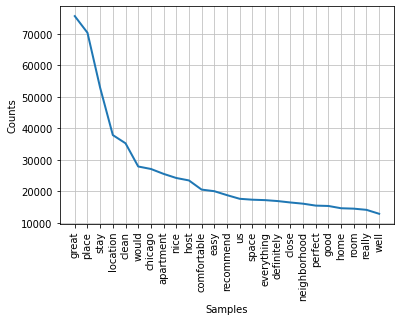

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [64]:
freq_dist.plot(25)

Try to Lemmatize the whole mess?

In [65]:
from collections import defaultdict
from nltk.corpus import wordnet as wn

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

Need to TAG all the words.

In [66]:
tagged = nltk.pos_tag(revP_words)

In [67]:
len(revP_words)

2635284

In [71]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

revP_lemma = []

# for word in tagged:
#     results3.append(wnl.lemmatize(word, get_wordnet_pos(word))) #for w in nltk.word_tokenize(sentence)])

for token, tag in tagged:
    lemma = wnl.lemmatize(token, tag_map[tag[0]])
    revP_lemma.append(lemma)

In [72]:
revP_lemma

['condo',
 'amaze',
 'spacious',
 'extremely',
 'clean',
 'appliance',
 'state',
 'art',
 'wonderfully',
 'stock',
 'kitchen',
 'location',
 'amaze',
 'find',
 'parking',
 'free',
 'culdesac',
 'jessica',
 'available',
 'texts',
 'time',
 'house',
 'clean',
 'nice',
 'beautiful',
 'safe',
 'neighborhood',
 'jessica',
 'great',
 'fast',
 'response',
 'place',
 'beautiful',
 'family',
 'love',
 'apartment',
 'clean',
 'decor',
 'great',
 'also',
 'really',
 'liked',
 'location',
 'nice',
 'safe',
 'neighborhood',
 'good',
 'restaurant',
 'park',
 'right',
 'across',
 'street',
 'bonus',
 'jessica',
 'answer',
 'question',
 'quickly',
 'super',
 'helpful',
 'definitely',
 'stay',
 'next',
 'time',
 'city',
 'lovely',
 'weekend',
 'rental',
 'exceptionally',
 'clean',
 'functional',
 '2',
 'couple',
 'bed',
 'soft',
 'comfortable',
 'deign',
 'unit',
 'lovely',
 'highend',
 'finish',
 'great',
 'central',
 'location',
 'lincoln',
 'park',
 'quick',
 'walk',
 'zoo',
 'well',
 'food',
 'old'

In [73]:
len(revP_lemma)

2635284

In [74]:
freq_dist = nltk.FreqDist(revP_lemma)

In [75]:
freq_dist

FreqDist({'great': 75752, 'place': 74444, 'stay': 66362, 'location': 38114, 'clean': 36070, 'host': 31241, 'would': 27845, 'chicago': 27062, 'apartment': 25733, 'nice': 24521, ...})

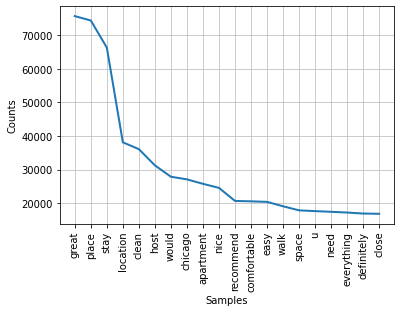

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [80]:
freq_dist.plot(20)

In [85]:
freq_dist20 = nltk.FreqDist(revP_lemma).most_common(20)

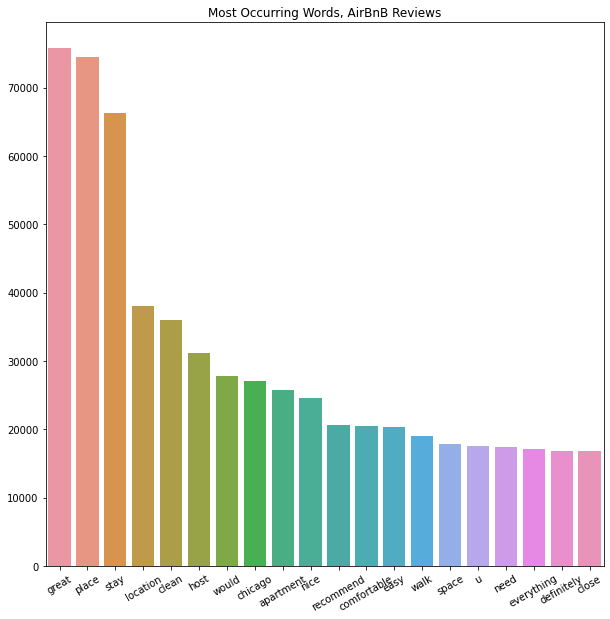

In [700]:
import seaborn as sns

fd_20 = pd.Series(dict(freq_dist20))

fig, ax = plt.subplots(figsize=(10,10))

fd_plot = sns.barplot(x=fd_20.index, y=fd_20.values, ax=ax).set_title('Most Occurring Words, AirBnB Reviews')

plt.xticks(rotation=30);

Wordcloud of the lemma'd words

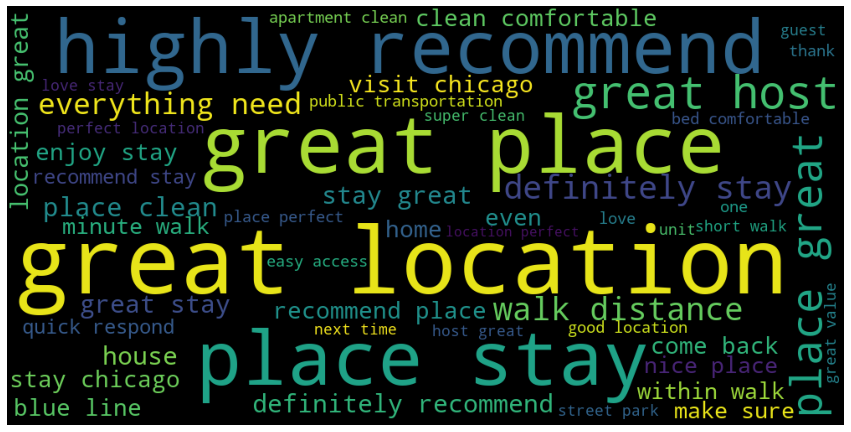

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=1000, height=500, max_words=50).generate(" ".join(revP_lemma))
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

OK.  Now work with sentences!  Start with one listing's reviews

In [96]:
revP_test

,Unnamed: 0,Unnamed: 0.1,id,listing_id,date,reviewer_id,reviewer_name,comments


In [99]:
revP_tr

,Unnamed: 0,Unnamed: 0.1,id,listing_id,date,reviewer_id,reviewer_name,comments
0,0,116840,69989174.0,12170773.0,4/15/16,65467524.0,Elizabeth,The condo was amazing. It was very spacious an...
1,1,116841,70277659.0,12170773.0,4/17/16,56990266.0,Pranith,Jessica was available on texts most of the tim...
2,2,116842,70615667.0,12170773.0,4/19/16,66514184.0,Katie,"Jessica is great, fast response! Our place was..."
3,3,116843,71131787.0,12170773.0,4/23/16,46343079.0,Alana,My family and I loved this apartment. It was v...
4,4,116844,71376925.0,12170773.0,4/25/16,61131477.0,Beth,We have a lovely weekend in this rental! It wa...
...,...,...,...,...,...,...,...,...
117059,117059,233899,556868477.0,21783531.0,10/30/19,8520589.0,Lindsey,Super clean listing that's very accessible to ...
117060,117060,233900,559780590.0,21783531.0,11/4/19,72254229.0,Howard,Great Location! We will definitely book this u...
117061,117061,233901,566148318.0,21783531.0,11/18/19,42144708.0,Rafael,"Great location, quite space, has a king size b..."
117062,117062,233902,215412883.0,21784716.0,11/29/17,13109574.0,Justin,(Website hidden by Airbnb) where do I begin? L...


In [296]:
revP_test = revP_tr.loc[revP_tr['listing_id'] == 12170773.0]
this_list_id = 12170773

In [105]:
revP_test

,Unnamed: 0,Unnamed: 0.1,id,listing_id,date,reviewer_id,reviewer_name,comments
0,0,116840,69989174.0,12170773.0,4/15/16,65467524.0,Elizabeth,The condo was amazing. It was very spacious an...
1,1,116841,70277659.0,12170773.0,4/17/16,56990266.0,Pranith,Jessica was available on texts most of the tim...
2,2,116842,70615667.0,12170773.0,4/19/16,66514184.0,Katie,"Jessica is great, fast response! Our place was..."
3,3,116843,71131787.0,12170773.0,4/23/16,46343079.0,Alana,My family and I loved this apartment. It was v...
4,4,116844,71376925.0,12170773.0,4/25/16,61131477.0,Beth,We have a lovely weekend in this rental! It wa...
...,...,...,...,...,...,...,...,...
321,321,117161,560088168.0,12170773.0,11/5/19,133068943.0,Julie,My sister and I took our daughters to Chicago ...
322,322,117162,560383496.0,12170773.0,11/6/19,53715907.0,Megan,Excellent location and communicative & accommo...
323,323,117163,561482376.0,12170773.0,11/9/19,27761453.0,Dwight,Great place to stay
324,324,117164,562328014.0,12170773.0,11/10/19,112564219.0,Shannon,Jessica made booking extremely easy and was ex...


process one listing

In [107]:
# This is how you get the LISTING for the reviews!!

lst.loc[lst['id'] == revP_test['listing_id'].iloc[0]]

,id,listing_url,name,description,host_id,host_since,neighbourhood,city,state,zipcode,...,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
1241,12170773,https://www.airbnb.com/rooms/12170773,Apartment in a Century Building Across from Li...,The remains of Art Deco arches lend character ...,10363033,12/1/13,Old Town,Chicago,IL,60614,...,$55.00,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period


In [111]:
# # tokenize the test data

# # Try to tokenize the comments

# # Make it a procedure to tokenize a batch of listing ID comments

# def tokenize_batch(revP_batch):
    
#     revP_tkn = []

#     for cmt in revP_batch['comments']:
#     #     print(cmt)
#     #     input()

#         revP_tkn.append(nltk.sent_tokenize(cmt))
        
#     return revP_tkn

In [112]:
revP_tkn

[['The condo was amazing.',
  'It was very spacious and extremely clean.',
  'All of the appliances are state of the art and it had a wonderfully stocked kitchen.',
  'The location is amazing and you can find parking for free in the cul-de-sac.'],
 ['Jessica was available on texts most of the times, The house was clean and nice and in a beautiful, safe neighborhood.'],
 ['Jessica is great, fast response!', 'Our place was beautiful.'],
 ['My family and I loved this apartment.',
  'It was very clean and the decor was great!',
  'We also really liked the location.',
  'Nice, safe neighborhood with good restaurants and the park right across the street was a bonus.',
  'Jessica answered any questions I had very quickly and was super helpful.',
  "We'd definitely stay here again the next time we're in the city."],
 ['We have a lovely weekend in this rental!',
  'It was exceptionally clean and very functional for 2 couples.',
  'The beds were very soft and comfortable, and she has deigned the

In [114]:
revP_tkn[0]

['The condo was amazing.',
 'It was very spacious and extremely clean.',
 'All of the appliances are state of the art and it had a wonderfully stocked kitchen.',
 'The location is amazing and you can find parking for free in the cul-de-sac.']

In [341]:
# Vars needed for processing.

# This was all with the main code initially

new_sent_list = []
clean_total_rating = 0
clean_total_count = 0

rating_dict = {"acc":[0,0],
               "clean":[0,0],
               "check":[0,0],
               "comm":[0,0],
              "loc":[0,0],
               "val":[0,0]}

results_DF = pd.DataFrame(columns = ["list_id", "accuracy_rating", "cleanliness_rating", 
                                      "checkin_rating", "communication_rating",
                                      "location_rating", "value_rating", 
                                      "true_accuracy", "true_cleanliness",
                                      "true_checkin", "true_communication",
                                      "true_location", "true_value"])



In [324]:
# tokenize the test data

# Try to tokenize the comments

# Make it a procedure to tokenize a batch of listing ID comments

def tokenize_batch(batch):
    
    revP_tkn = []

    for cmt in batch['comments']:
    #     print(cmt)
    #     input()

        revP_tkn.append(nltk.sent_tokenize(cmt))
        
    return revP_tkn

In [326]:
id_nums = revP_tr.listing_id.unique()

In [329]:
len(revP_tr)

117064

In [328]:
len(id_nums)

1646

In [467]:
revP_tr

,Unnamed: 0,Unnamed: 0.1,id,listing_id,date,reviewer_id,reviewer_name,comments
0,0,116840,69989174.0,12170773.0,4/15/16,65467524.0,Elizabeth,The condo was amazing. It was very spacious an...
1,1,116841,70277659.0,12170773.0,4/17/16,56990266.0,Pranith,Jessica was available on texts most of the tim...
2,2,116842,70615667.0,12170773.0,4/19/16,66514184.0,Katie,"Jessica is great, fast response! Our place was..."
3,3,116843,71131787.0,12170773.0,4/23/16,46343079.0,Alana,My family and I loved this apartment. It was v...
4,4,116844,71376925.0,12170773.0,4/25/16,61131477.0,Beth,We have a lovely weekend in this rental! It wa...
...,...,...,...,...,...,...,...,...
117059,117059,233899,556868477.0,21783531.0,10/30/19,8520589.0,Lindsey,Super clean listing that's very accessible to ...
117060,117060,233900,559780590.0,21783531.0,11/4/19,72254229.0,Howard,Great Location! We will definitely book this u...
117061,117061,233901,566148318.0,21783531.0,11/18/19,42144708.0,Rafael,"Great location, quite space, has a king size b..."
117062,117062,233902,215412883.0,21784716.0,11/29/17,13109574.0,Justin,(Website hidden by Airbnb) where do I begin? L...


In [468]:
rev_batch1

,id,listing_id,date,reviewer_id,reviewer_name,comments
0,25218143,2384,1/9/15,14385014,Ivan,it's a wonderful trip experience. I didn't exc...
1,28475392,2384,3/24/15,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...
2,30273263,2384,4/19/15,26101401,Patrick,The reservation was canceled 80 days before ar...
3,30974202,2384,4/30/15,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...
4,31363208,2384,5/4/15,31293837,SuJung,Rebecca was an absolutely wonderful host.\r\n\...
...,...,...,...,...,...,...
116835,333696318,12159695,10/7/18,2980548,Christina,"The house is just a block from the Blue line, ..."
116836,448733096,12159695,5/5/19,58521213,Adrian,Good place! Good value!
116837,547679964,12159695,10/15/19,3709372,Mallaury,I had a lovely stay at Justine's place! She's ...
116838,68656134,12170773,4/6/16,4422023,Dwayne,I would like to say we had a wonderful experie...


In [702]:
# quick analysis of listings - for use in analysis described in the document.
lst.describe()

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,8.533000e+03,8.533000e+03,8533.000000,8533.000000,8533.000000,8530.000000,8529.000000,7289.000000,7289.000000,7289.000000,7288.000000,7287.000000,7288.000000,7288.000000
mean,2.568287e+07,9.136513e+07,41.900679,-87.664596,4.331654,1.376436,1.643217,95.187817,9.732748,9.576074,9.818880,9.822012,9.691136,9.510291
std,1.108914e+07,8.758527e+07,0.057041,0.041218,2.972712,0.779565,1.200537,6.671592,0.668751,0.751149,0.572567,0.565276,0.660159,0.739338
min,2.384000e+03,2.140000e+03,41.650990,-87.934660,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.805955e+07,1.572523e+07,41.874500,-87.686930,2.000000,1.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.769444e+07,5.597679e+07,41.902960,-87.661150,4.000000,1.000000,1.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.538766e+07,1.572620e+08,41.940000,-87.634400,6.000000,2.000000,2.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.026441e+07,3.106326e+08,42.022280,-87.537900,32.000000,21.000000,24.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### The Main code to run the analysis.

The following code takes the dataframe containing the tokenized reviews in sentence form and the list of unique Listing IDs, and performs the following steps:

+ Batches the Reviews by Listing ID
+ Creates a Rating Dictionary for each ID
+ Tokenizes each word in the sentence with a Part of Speech, for Lemmatizing
+ Cleans each sentence in that batch's reviews
    + Tokenizes the sentence
    + Removes stop words, and changes all words to lowercase
    + Lemmatizes each word in the sentence.
+ Gets a sentiment score for each sentence
+ Creates a results DF

In [435]:
# ------------------------------------------
# Main driving code.  This code takes the reviews dataset and the Listing IDs in that dataset.
# ------------------------------------------

for list_id in id_nums:
    
    # reset new_sent_list
    new_sent_list = []
   
    # reset the rating dict for each ID
    rating_dict = {"acc":[0,0],
               "clean":[0,0],
               "check":[0,0],
               "comm":[0,0],
              "loc":[0,0],
               "val":[0,0]}
    
    revP_batch = revP_tr.loc[revP_tr['listing_id'] == list_id]
    # print(len(revP_batch))
    this_list_id = list_id
    
    revP_tkn = tokenize_batch(revP_batch)

    for cmt in revP_tkn:
        for sentence in cmt:       
            new_sent_list.append(clean_sentence(sentence))

    for sentence in new_sent_list:
        if len(sentence) > 0:
            sent_score, sent_type = get_sentiment_score(sentence)
            
            if sent_type == 'all':
                rating_dict['acc'][0] += sent_score
                rating_dict['acc'][1] += 1
                rating_dict['clean'][0] += sent_score
                rating_dict['clean'][1] += 1
                rating_dict['check'][0] += sent_score
                rating_dict['check'][1] += 1
                rating_dict['comm'][0] += sent_score
                rating_dict['comm'][1] += 1
                rating_dict['loc'][0] += sent_score
                rating_dict['loc'][1] += 1
                rating_dict['val'][0] += sent_score
                rating_dict['val'][1] += 1
            else:                            
                if sent_type != None:
                    rating_dict[sent_type][0] += sent_score
                    rating_dict[sent_type][1] += 1

    for i in ["acc", "clean", "check", "comm", "loc", "val"]:
        if rating_dict[i][1] == 0:
            rating_dict[i][1] = 1
    
    true_rating = lst.loc[lst['id'] == this_list_id]

    results_DF = results_DF.append({"list_id": this_list_id, 
                       "accuracy_rating": rating_dict['acc'][0]/rating_dict['acc'][1],
                       "cleanliness_rating": rating_dict['clean'][0]/rating_dict['clean'][1],
                       "checkin_rating": rating_dict['check'][0]/rating_dict['check'][1],
                       "communication_rating": rating_dict['comm'][0]/rating_dict['comm'][1],
                       "location_rating": rating_dict['loc'][0]/rating_dict['loc'][1],
                       "value_rating": rating_dict['val'][0]/rating_dict['val'][1],
                       "true_accuracy": true_rating.review_scores_accuracy.item(),
                       "true_cleanliness": true_rating.review_scores_cleanliness.item(),
                       "true_checkin": true_rating.review_scores_checkin.item(),
                       "true_communication": true_rating.review_scores_communication.item(),
                       "true_location": true_rating.review_scores_location.item(),
                       "true_value": true_rating.review_scores_value.item()}, ignore_index=True)
    




326
1
41
14
136
1
1
123
84
106
89
11
128
36
24
35
36
190
1
6
193
239
64
46
145
134
215
98
36
18
92
229
68
53
1
53
226
75
198
7
137
200
93
15
33
1
45
84
34
21
1
32
57
188
25
71
3
11
105
64
164
33
134
36
1
12
256
71
5
97
12
16
63
5
9
60
12
128
113
121
63
7
47
159
189
186
142
11
21
322
328
84
16
318
32
89
89
327
18
81
161
218
6
105
31
232
100
2
130
25
153
164
162
9
33
33
123
22
7
34
67
46
179
138
35
188
72
216
42
17
162
1
133
210
11
226
30
54
49
210
17
126
32
349
50
26
170
64
4
163
48
221
63
95
154
2
103
134
188
96
80
135
17
2
133
195
299
95
11
27
94
193
112
91
133
121
75
59
40
256
191
357
115
39
3
2
207
36
63
9
176
205
22
317
12
84
89
104
31
82
338
59
7
47
290
366
20
137
144
123
54
145
18
25
21
64
25
108
23
22
90
55
4
143
116
47
164
143
166
23
127
4
168
27
96
49
67
5
6
47
18
70
70
153
10
6
5
90
321
340
44
89
23
76
33
168
271
4
221
140
419
125
21
115
69
27
101
163
105
44
30
38
6
29
64
99
10
14
200
8
366
173
5
87
110
39
201
5
55
35
37
20
94
65
26
82
57
8
319
77
41
47
209
14
22
13
14
81
100

In [703]:
len(results_DF)

34786

In [704]:
results_DF.sample(20)

,list_id,accuracy_rating,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating,true_accuracy,true_cleanliness,true_checkin,true_communication,true_location,true_value
27429,39899689.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.0,10.0,10.0,10.0,10.0,10.0
13902,16831457.0,8.317992,8.345679,8.342268,8.321503,8.348178,8.331950,10.0,10.0,10.0,10.0,10.0,10.0
30027,33344522.0,9.052632,9.052632,9.052632,9.047619,9.100000,9.052632,9.0,9.0,9.0,9.0,9.0,9.0
17716,5126218.0,8.518519,8.518519,8.518519,8.518519,8.518519,8.518519,10.0,9.0,10.0,10.0,10.0,9.0
23575,24773530.0,8.493151,8.486111,8.527027,8.500000,8.506849,8.506849,9.0,9.0,9.0,9.0,10.0,9.0
11436,21473402.0,8.395604,8.430108,8.463158,8.395604,8.395604,8.387097,9.0,9.0,10.0,10.0,10.0,9.0
11317,20997012.0,8.272727,8.347826,8.272727,8.260870,8.416667,8.260870,10.0,9.0,9.0,9.0,10.0,10.0
24319,28169163.0,8.434783,8.560000,8.434783,8.434783,8.458333,8.434783,8.0,9.0,8.0,9.0,9.0,9.0
19410,9342355.0,8.344937,8.350158,8.407855,8.341772,8.387195,8.339683,10.0,10.0,10.0,10.0,10.0,10.0
17344,773127.0,8.163606,8.181219,8.169154,8.163062,8.210356,8.169154,10.0,10.0,10.0,10.0,10.0,10.0


In [436]:
# Calculates the means for each column in the results DF

means = results_DF.mean()
means

list_id                 1.742530e+07
accuracy_rating         4.911895e+00
cleanliness_rating      7.818224e+00
checkin_rating          7.786084e+00
communication_rating    7.234852e+00
location_rating         7.853182e+00
value_rating            7.174825e+00
true_accuracy           9.816277e+00
true_cleanliness        9.604205e+00
true_checkin            9.886401e+00
true_communication      9.893665e+00
true_location           9.714169e+00
true_value              9.580280e+00
dtype: float64

Create the Total Mean Difference Results table from the means.

In [705]:
tot_mean_diff = pd.DataFrame(columns = ["Category", "Mean_Difference"])


In [706]:
tot_mean_diff = tot_mean_diff.append({"Category": "accuracy_diff", "Mean_Difference": 
                                      means.true_accuracy - means.accuracy_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "cleanliness_diff", "Mean_Difference": 
                                      means.true_cleanliness - means.cleanliness_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "checkin_diff", "Mean_Difference": 
                                      means.true_checkin - means.checkin_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "communication_diff", "Mean_Difference": 
                                      means.true_communication - means.communication_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "location_diff", "Mean_Difference": 
                                      means.true_location - means.location_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "value_diff", "Mean_Difference": 
                                      means.true_value - means.value_rating}, ignore_index=True)

In [707]:
tot_mean_diff

,Category,Mean_Difference
0,accuracy_diff,3.282758
1,cleanliness_diff,1.851901
2,checkin_diff,2.126833
3,communication_diff,2.375808
4,location_diff,1.941085
5,value_diff,2.087862


In [565]:
# Helper code for the stop words and the Lemmatizer

from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
# pattern = '[{}]'.format(re.escape(string.punctuation))
# punc_regex = re.compile(pattern)
# punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
stopwords = nltk.corpus.stopwords.words('english')

from collections import defaultdict
from nltk.corpus import wordnet as wn

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
    
    

In [564]:
"""
clean_sentence recieves a review sentence from the main code

Args:
    snt  (List of str) : A sentence from the reviews
Returns
    new_str  (list of str) : A tokenized, stop word cleaned, lowercased, lemmatized version of the sentence.
"""

def clean_sentence(snt):
    new = sent_tokenize(snt)
    new_str = new[0]
    # print("new_str is: ", new_str)
    new_str = re.sub(r'[^\w\s]','',new_str).lower()
    
    # stop words    
    new_str_tkns = word_tokenize(new_str)
    new_str = [item for item in new_str_tkns if not item in stopwords]
    
    # print("new_str after stop: ", new_str)
    
    # Contractions
    # revP_words = list(filter(None , [contractions.fix(word)  for word in  revP_words ]))

    tagged = nltk.pos_tag(new_str)
    # print("tagged: ", tagged)
    
    # revP_lemma = []
    new_str = []
    for token, tag in tagged:
        lemma = wnl.lemmatize(token, tag_map[tag[0]])
        new_str.append(lemma)
        
    # print("new_str after lemma: ", new_str)
    
    # sentiment_df = get_sentiment_score(new_str)
    
    return new_str


In [614]:
# Category trigger words, as sets
# This list was incrementally improved as the comments were examined
# to improve results.  Yes, I even used a Thesaurus

accuracy_set = {"accurate", "accuracy", "true", "match", "clear", "honest", "truth", 
                "truthful", "authentic", "fair", "genuine", "sincere", "work", "real", 
                "legitimate", "exact", "exactly", "fact", "original", "faith", "faithful", 
                "sure", "picture", "represent", "representation", "listing"}
cleanliness_set = {"floor", "toilet", "shower", "wall", "smell", "bathroom", "clean", 
                   "fresh", "spotless", "tidy", "pure", "orderly", "order", "door", "window", 
                   "stair", "light", "odor", "mess", "messy"}
checkin_set = {"apartment", "easy", "access", "instruction", "clear", 
               "information", "direction", "efficient"}
comm_set = {"host", "responsive", "response", "fast", "communicate", "request", "query", 
            "message", "note", "connect", "contact", "correspond", "inform", "information"}
loc_set = {"view", "location", "comfortable", "central", "neighborhood", "city", "island", 
           "quiet", "district", "area", "part", "region", "section", "spot", "site", "close"}
value_set = {"money", "price", "budget", "group", "affordable", "afford", "space", "size", 
             "large", "area", "modern", "expense", "rate", "expenditure", "pay", "payment", 
             "worth", "cheap", "worth"}




# Review sentiment words
positive_rev_words = {'great', 'excellent', 'good', 'nice', 'pretty', 'clean', 'easy', 'positive', 'cozy', 
                      'awesome', 'big', 'love', 'quiet', 'perfect', 'sweet', 'huge', 'vast', 'exceptional',
                     'marvelous', 'satisfactory', 'superb', 'wonderful', 'please', 'pleasing', 'prime',
                     'first-class', 'superior', 'ok', 'beautiful', 'affordable', 'value', 'accurate', 'fair',
                     'true', 'quiet', 'large', 'modern', 'pure', 'definitely'}
negative_rev_words = {'bad', 'dirty', 'poor', 'dark', 'negative', 'hate', 'dislike', 'loud', 'awful', 
                      'thin', 'small', 'cheap', 'tiny', 'crummy', 'dreadful', 'lousy', 'rough', 'sad',
                     'unacceptable', 'bummer', 'gross', 'junk', 'dump', 'crap', 'crappy', 'cheese', 'cheesy'}

In [612]:
"""
get_sentiment_score receives a sentence, and returns a score and a category.

Args:
    str_lst (list of str) : The processed sentence
Returns:
    tot (int) : The calc'd integer rating for that sentence
    tot_type (str) : The type - Acc, Clean, check, etc.. - for this rating.
""" 



def get_sentiment_score(str_lst):
    
    if len(str_lst) < 4:
        tot = rate_it(str_lst)
        tot_type = "all"
        return tot, tot_type
    
    else:   
        for word in str_lst:

            if word in cleanliness_set:
                # print("We have a hit!")
                tot = rate_it(str_lst)
                tot_type = "clean"
                # print(tot, tot_type)
            elif word in accuracy_set:
                tot = rate_it(str_lst)
                tot_type = "acc"
            elif word in checkin_set:
                tot = rate_it(str_lst)
                tot_type = "check"
            elif word in comm_set:
                tot = rate_it(str_lst)
                tot_type = "comm"
            elif word in loc_set:
                tot = rate_it(str_lst)
                tot_type = "loc"
            elif word in value_set:
                tot = rate_it(str_lst)
                tot_type = "val"
            else:
                tot = 9  # changed from 0
                tot_type = "all"   # change from None

            # print(tot, tot_type)
            return tot, tot_type     

In [613]:
"""
Returns the numeric rating, based on if the word is determined to be positive, negative or nuetral

Args:
    str_lst (list of str) : The processed sentence from the reviews.
Returns:
    rating (int) : A numeric rating based on the sentiment determined.

"""

# Going under the assumption that each sentance will only hold one sentiment

def rate_it(str_lst):       
    
    for www in str_lst:
        # print(www)
        if www in positive_rev_words:
            # print('pos')
            rating = 10
            break
        elif www in negative_rev_words:
            # print('neg')
            rating = 7
            break
        else:
            rating = 9
    # print(rating)
    return rating
            
            

Had some issues with strange columns appearing.  Will need to research more.

In [657]:
# revP_tr = revP_tr.drop('Unnamed: 0', 1)

In [658]:
# revP_tr = revP_tr.drop('Unnamed: 0.1', 1)

In [709]:
# revP_tr

Double check the types of the columns

In [660]:
# revP_tr = revP_tr.astype({"id": np.float64, "listing_id": np.float64, "reviewer_id": np.float64})

# revP_tr = revP_tr.astype({"id": np.int64, "listing_id": np.int64, "reviewer_id": np.int64})

In [661]:
revP_tr

,id,listing_id,date,reviewer_id,reviewer_name,comments
0,69989174,12170773,4/15/16,65467524,Elizabeth,The condo was amazing. It was very spacious an...
1,70277659,12170773,4/17/16,56990266,Pranith,Jessica was available on texts most of the tim...
2,70615667,12170773,4/19/16,66514184,Katie,"Jessica is great, fast response! Our place was..."
3,71131787,12170773,4/23/16,46343079,Alana,My family and I loved this apartment. It was v...
4,71376925,12170773,4/25/16,61131477,Beth,We have a lovely weekend in this rental! It wa...
...,...,...,...,...,...,...
117059,556868477,21783531,10/30/19,8520589,Lindsey,Super clean listing that's very accessible to ...
117060,559780590,21783531,11/4/19,72254229,Howard,Great Location! We will definitely book this u...
117061,566148318,21783531,11/18/19,42144708,Rafael,"Great location, quite space, has a king size b..."
117062,215412883,21784716,11/29/17,13109574,Justin,(Website hidden by Airbnb) where do I begin? L...


In [662]:
# Save the corrected file again.

# revP_tr.to_csv("reviews_trans.csv")

In [ ]:
# ---------------------------------------
# RUNS on TEST DATA

# The following code is a duplicate of the MAIN code from above, to run the analysis on the 
# other two batches of reviews.

# ---------------------------------------

In [663]:
# revP_tr = pd.read_csv("reviews_trans.csv")

In [664]:
revP_tr

,Unnamed: 0,id,listing_id,date,reviewer_id,reviewer_name,comments
0,0,69989174,12170773,4/15/16,65467524,Elizabeth,The condo was amazing. It was very spacious an...
1,1,70277659,12170773,4/17/16,56990266,Pranith,Jessica was available on texts most of the tim...
2,2,70615667,12170773,4/19/16,66514184,Katie,"Jessica is great, fast response! Our place was..."
3,3,71131787,12170773,4/23/16,46343079,Alana,My family and I loved this apartment. It was v...
4,4,71376925,12170773,4/25/16,61131477,Beth,We have a lovely weekend in this rental! It wa...
...,...,...,...,...,...,...,...
117059,117059,556868477,21783531,10/30/19,8520589,Lindsey,Super clean listing that's very accessible to ...
117060,117060,559780590,21783531,11/4/19,72254229,Howard,Great Location! We will definitely book this u...
117061,117061,566148318,21783531,11/18/19,42144708,Rafael,"Great location, quite space, has a king size b..."
117062,117062,215412883,21784716,11/29/17,13109574,Justin,(Website hidden by Airbnb) where do I begin? L...


In [710]:
# ------------------------------------
# Code to reset for each batch to run through the analysis again
# Depending on which line is uncommented, it runs that batch

# rev_batch1 = rev.iloc[:116840]  # For Batch #1
# rev_batch1 = revP_tr            # For Batch #2 - my initial batch
# rev_batch1 = rev.iloc[233905:]  # For Batch #3 

In [712]:
rev_batch1

,id,listing_id,date,reviewer_id,reviewer_name,comments
0,25218143,2384,1/9/15,14385014,Ivan,it's a wonderful trip experience. I didn't exc...
1,28475392,2384,3/24/15,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...
2,30273263,2384,4/19/15,26101401,Patrick,The reservation was canceled 80 days before ar...
3,30974202,2384,4/30/15,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...
4,31363208,2384,5/4/15,31293837,SuJung,Rebecca was an absolutely wonderful host.\r\n\...
...,...,...,...,...,...,...
116835,333696318,12159695,10/7/18,2980548,Christina,"The house is just a block from the Blue line, ..."
116836,448733096,12159695,5/5/19,58521213,Adrian,Good place! Good value!
116837,547679964,12159695,10/15/19,3709372,Mallaury,I had a lovely stay at Justine's place! She's ...
116838,68656134,12170773,4/6/16,4422023,Dwayne,I would like to say we had a wonderful experie...


In [641]:
rev_batch1.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
id                0
listing_id        0
date              0
reviewer_id       0
reviewer_name     0
comments         74
dtype: int64

In [642]:
rev_batch1.comments.fillna("No Comment Provided", inplace=True)
rev_batch1.isna().sum()

Unnamed: 0       0
Unnamed: 0.1     0
id               0
listing_id       0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [644]:
rev_batch1.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
id               float64
listing_id       float64
date              object
reviewer_id      float64
reviewer_name     object
comments          object
dtype: object

In [628]:
type(rev_batch1)

pandas.core.frame.DataFrame

In [645]:
# rev_batch1 = revP_test.astype({"id": np.float64, "listing_id": np.float64, "reviewer_id": np.float64})

# rev_batch1 = rev_batch1.astype({"id": np.int64, "listing_id": np.int64, "reviewer_id": np.int64})

In [713]:
rev_batch1

,id,listing_id,date,reviewer_id,reviewer_name,comments
0,25218143,2384,1/9/15,14385014,Ivan,it's a wonderful trip experience. I didn't exc...
1,28475392,2384,3/24/15,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...
2,30273263,2384,4/19/15,26101401,Patrick,The reservation was canceled 80 days before ar...
3,30974202,2384,4/30/15,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...
4,31363208,2384,5/4/15,31293837,SuJung,Rebecca was an absolutely wonderful host.\r\n\...
...,...,...,...,...,...,...
116835,333696318,12159695,10/7/18,2980548,Christina,"The house is just a block from the Blue line, ..."
116836,448733096,12159695,5/5/19,58521213,Adrian,Good place! Good value!
116837,547679964,12159695,10/15/19,3709372,Mallaury,I had a lovely stay at Justine's place! She's ...
116838,68656134,12170773,4/6/16,4422023,Dwayne,I would like to say we had a wonderful experie...


NOW RUN THROUGH TEST DATA - Batch1

In [647]:
id_nums = rev_batch1.listing_id.unique()
id_nums

array([12170773, 12175196, 12201757, ..., 21783333, 21783531, 21784716])

In [648]:
len(id_nums)

1646

In [649]:
# ------------------------------------------
# Main driving code? PART TWO!!  To run through another batch of Data

# For More Details, SEE ABOVE!!
# ------------------------------------------

for list_id in id_nums:
    
    # reset new_sent_list
    new_sent_list = []
   
    # reset the rating dict for each ID
    rating_dict = {"acc":[0,0],
               "clean":[0,0],
               "check":[0,0],
               "comm":[0,0],
              "loc":[0,0],
               "val":[0,0]}
    
    revP_batch = rev_batch1.loc[rev_batch1['listing_id'] == list_id]
    # print(len(revP_batch))
    this_list_id = list_id
    
    revP_tkn = tokenize_batch(revP_batch)

    for cmt in revP_tkn:
        for sentence in cmt:       
            new_sent_list.append(clean_sentence(sentence))

    for sentence in new_sent_list:
        if len(sentence) > 0:
            sent_score, sent_type = get_sentiment_score(sentence)
            
            if sent_type == 'all':
                rating_dict['acc'][0] += sent_score
                rating_dict['acc'][1] += 1
                rating_dict['clean'][0] += sent_score
                rating_dict['clean'][1] += 1
                rating_dict['check'][0] += sent_score
                rating_dict['check'][1] += 1
                rating_dict['comm'][0] += sent_score
                rating_dict['comm'][1] += 1
                rating_dict['loc'][0] += sent_score
                rating_dict['loc'][1] += 1
                rating_dict['val'][0] += sent_score
                rating_dict['val'][1] += 1
            else:                            
                if sent_type != None:
                    rating_dict[sent_type][0] += sent_score
                    rating_dict[sent_type][1] += 1

    for i in ["acc", "clean", "check", "comm", "loc", "val"]:
        if rating_dict[i][1] == 0:
            rating_dict[i][1] = 1
    
    true_rating = lst.loc[lst['id'] == this_list_id]

    results_DF = results_DF.append({"list_id": this_list_id, 
                       "accuracy_rating": rating_dict['acc'][0]/rating_dict['acc'][1],
                       "cleanliness_rating": rating_dict['clean'][0]/rating_dict['clean'][1],
                       "checkin_rating": rating_dict['check'][0]/rating_dict['check'][1],
                       "communication_rating": rating_dict['comm'][0]/rating_dict['comm'][1],
                       "location_rating": rating_dict['loc'][0]/rating_dict['loc'][1],
                       "value_rating": rating_dict['val'][0]/rating_dict['val'][1],
                       "true_accuracy": true_rating.review_scores_accuracy.item(),
                       "true_cleanliness": true_rating.review_scores_cleanliness.item(),
                       "true_checkin": true_rating.review_scores_checkin.item(),
                       "true_communication": true_rating.review_scores_communication.item(),
                       "true_location": true_rating.review_scores_location.item(),
                       "true_value": true_rating.review_scores_value.item()}, ignore_index=True)
    



326
1
41
14
136
1
1
123
84
106
89
11
128
36
24
35
36
190
1
6
193
239
64
46
145
134
215
98
36
18
92
229
68
53
1
53
226
75
198
7
137
200
93
15
33
1
45
84
34
21
1
32
57
188
25
71
3
11
105
64
164
33
134
36
1
12
256
71
5
97
12
16
63
5
9
60
12
128
113
121
63
7
47
159
189
186
142
11
21
322
328
84
16
318
32
89
89
327
18
81
161
218
6
105
31
232
100
2
130
25
153
164
162
9
33
33
123
22
7
34
67
46
179
138
35
188
72
216
42
17
162
1
133
210
11
226
30
54
49
210
17
126
32
349
50
26
170
64
4
163
48
221
63
95
154
2
103
134
188
96
80
135
17
2
133
195
299
95
11
27
94
193
112
91
133
121
75
59
40
256
191
357
115
39
3
2
207
36
63
9
176
205
22
317
12
84
89
104
31
82
338
59
7
47
290
366
20
137
144
123
54
145
18
25
21
64
25
108
23
22
90
55
4
143
116
47
164
143
166
23
127
4
168
27
96
49
67
5
6
47
18
70
70
153
10
6
5
90
321
340
44
89
23
76
33
168
271
4
221
140
419
125
21
115
69
27
101
163
105
44
30
38
6
29
64
99
10
14
200
8
366
173
5
87
110
39
201
5
55
35
37
20
94
65
26
82
57
8
319
77
41
47
209
14
22
13
14
81
100

In [714]:
results_DF

,list_id,accuracy_rating,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating,true_accuracy,true_cleanliness,true_checkin,true_communication,true_location,true_value
0,12170773.0,0.000000,9.444444,8.039216,7.000000,7.800000,10.000000,10.0,10.0,10.0,10.0,10.0,10.0
1,12175196.0,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,10.0,6.0,10.0,10.0,10.0,8.0
2,12201757.0,0.000000,8.333333,7.500000,6.250000,7.500000,6.250000,10.0,10.0,10.0,10.0,10.0,10.0
3,12170773.0,0.000000,9.444444,8.039216,7.000000,7.800000,10.000000,10.0,10.0,10.0,10.0,10.0,10.0
4,12175196.0,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,10.0,6.0,10.0,10.0,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34781,21772553.0,9.168000,9.196911,9.178782,9.168651,9.179337,9.175889,10.0,10.0,10.0,10.0,9.0,10.0
34782,21782770.0,9.191235,9.204724,9.194444,9.196078,9.190661,9.193676,10.0,10.0,10.0,10.0,10.0,10.0
34783,21783333.0,9.153748,9.154430,9.157161,9.156566,9.161250,9.161006,10.0,10.0,10.0,10.0,10.0,10.0
34784,21783531.0,9.158501,9.173789,9.195055,9.158960,9.165266,9.169054,10.0,10.0,10.0,10.0,10.0,9.0


In [715]:
means = results_DF.mean()
means

list_id                 1.910677e+07
accuracy_rating         6.495231e+00
cleanliness_rating      7.738990e+00
checkin_rating          7.731884e+00
communication_rating    7.487140e+00
location_rating         7.761806e+00
value_rating            7.463512e+00
true_accuracy           9.777990e+00
true_cleanliness        9.590891e+00
true_checkin            9.858716e+00
true_communication      9.862948e+00
true_location           9.702891e+00
true_value              9.551373e+00
dtype: float64

In [716]:
tot_mean_diff = pd.DataFrame(columns = ["Category", "Mean_Difference"])

In [717]:
tot_mean_diff = tot_mean_diff.append({"Category": "accuracy_diff", "Mean_Difference": 
                                      means.true_accuracy - means.accuracy_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "cleanliness_diff", "Mean_Difference": 
                                      means.true_cleanliness - means.cleanliness_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "checkin_diff", "Mean_Difference": 
                                      means.true_checkin - means.checkin_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "communication_diff", "Mean_Difference": 
                                      means.true_communication - means.communication_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "location_diff", "Mean_Difference": 
                                      means.true_location - means.location_rating}, ignore_index=True)
tot_mean_diff = tot_mean_diff.append({"Category": "value_diff", "Mean_Difference": 
                                      means.true_value - means.value_rating}, ignore_index=True)

In [718]:
tot_mean_diff

,Category,Mean_Difference
0,accuracy_diff,3.282758
1,cleanliness_diff,1.851901
2,checkin_diff,2.126833
3,communication_diff,2.375808
4,location_diff,1.941085
5,value_diff,2.087862
